https://shap.readthedocs.io/en/latest/index.html

In [22]:
import shap
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from pickle import load

shap.initjs()

In [2]:
data = pd.read_csv(r"../data/processed_data/complete_data.csv", index_col=0)
columns = data.columns


In [3]:
x = data.drop(["TARGET"], axis=1)
y = data.filter(["TARGET"], axis=1)

scaler = load(open(r"scaler/scaler.pkl", "rb"))
x_scaled = scaler.transform(x)
y = y.values.reshape(y.shape[0])

x_scaled.shape, y.shape


((565372, 202), (565372,))

In [4]:
split = 0.8

x_train, y_train = x_scaled[:int(len(x_scaled) * split)], y[:int(len(y) * split)] # hyperparameter set
x_test, y_test = x_scaled[int(len(x_scaled) * split):], y[int(len(y) * split):] # test set

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((452297, 202), (452297,), (113075, 202), (113075,))

In [5]:
model = keras.models.load_model(r"../models/neural_network/BayOpt_v1/")

In [6]:
explainer = shap.DeepExplainer(model, x_test[:500])
shap_values = explainer.shap_values(x_test[:500])


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


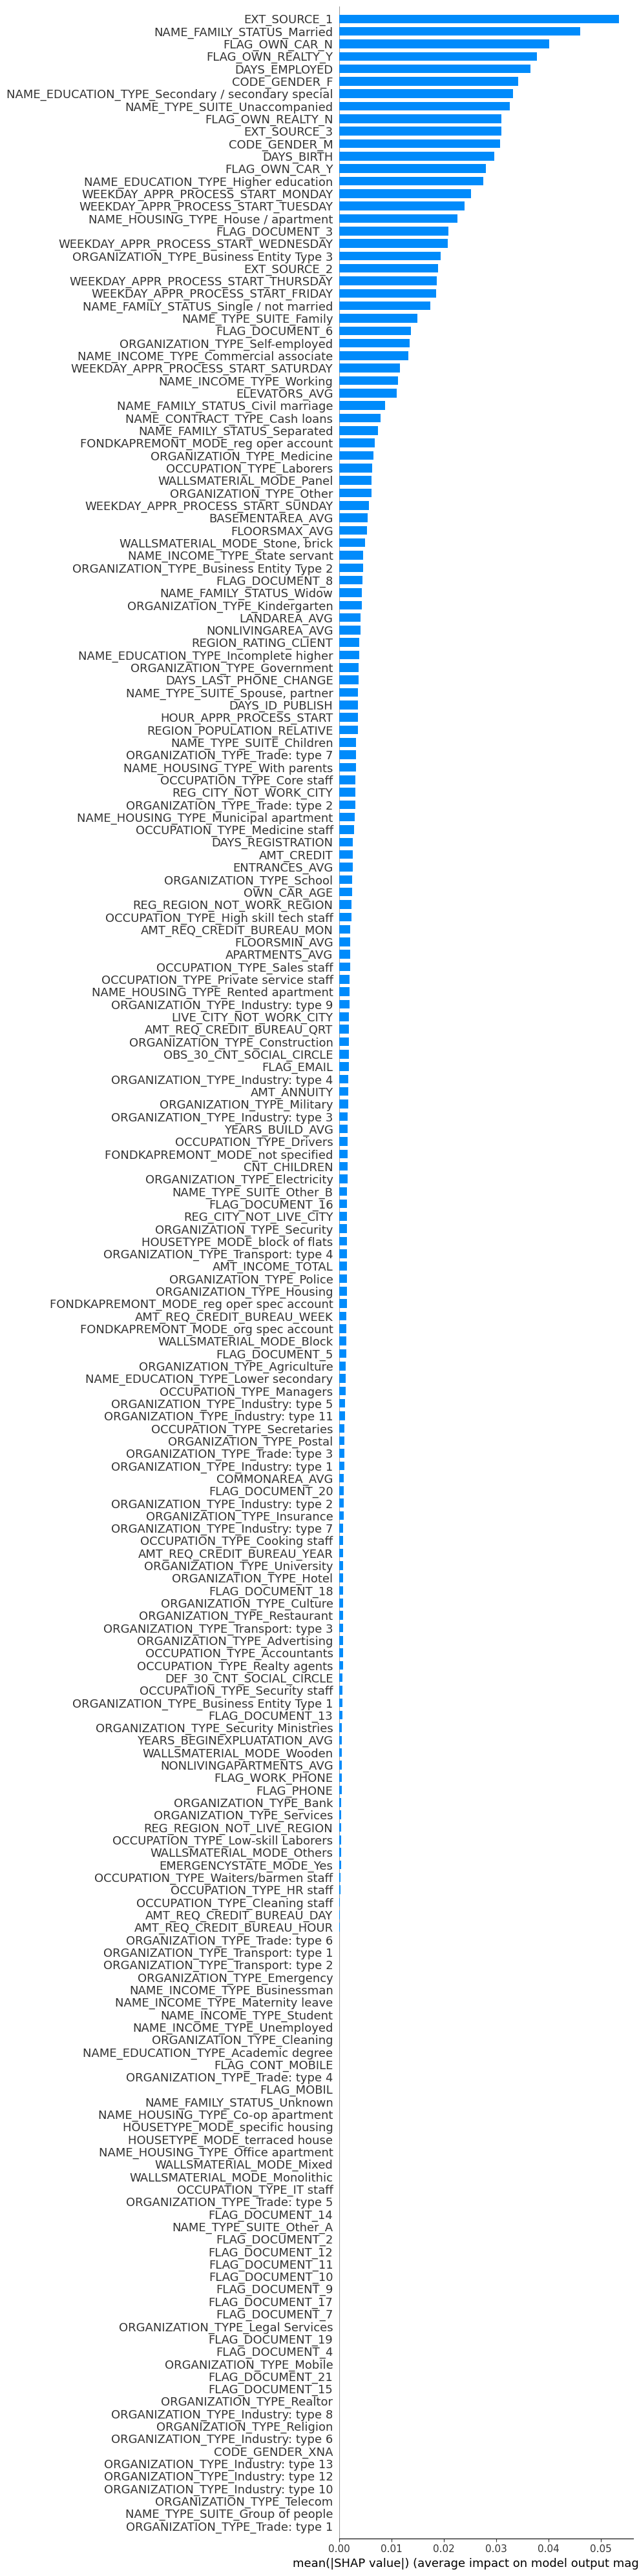

In [8]:
shap.summary_plot(
    shap_values[0], plot_type="bar", feature_names=columns, plot_size=[10, 40], max_display=x_train.shape[1]
)

In [24]:
shap.force_plot(
    explainer.expected_value[0].numpy(),
    shap_values[0],
    features=columns,
    matplotlib=False,
)

IndexError: index 202 is out of bounds for axis 0 with size 202

In [11]:
shap.decision_plot(
    explainer.expected_value[0].numpy(),
    shap_values[0][0],
    features=x_test,
    feature_names=list(columns),
)

ValueError: The feature_names arg must include all features represented in shap_values.

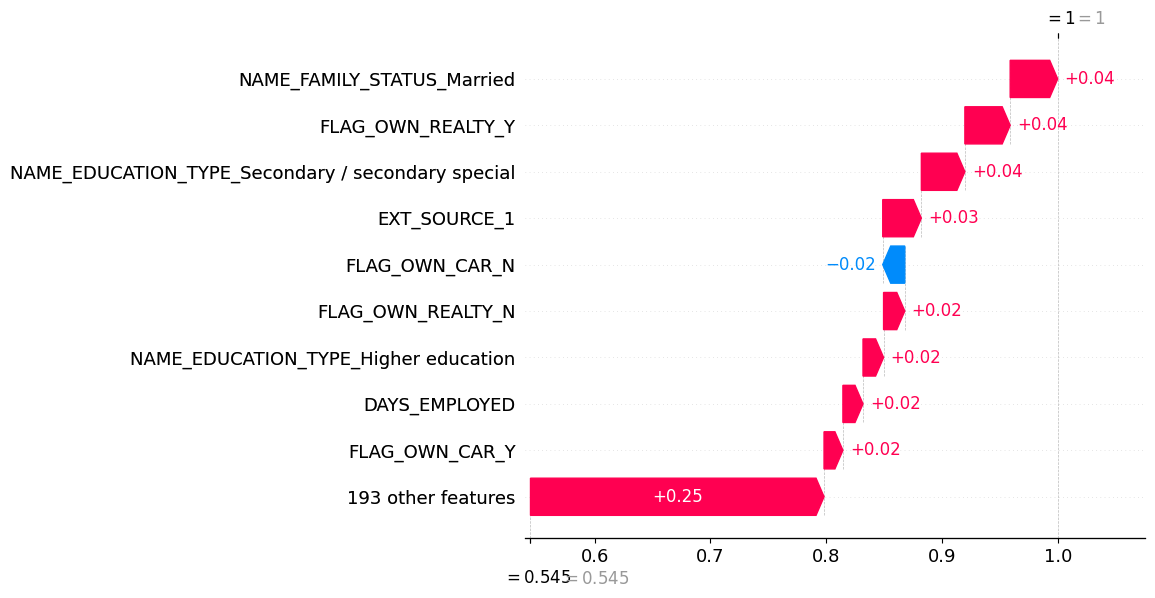

In [12]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[0].numpy(),
    shap_values[0][0],
    feature_names=columns,
)